# Decision Tree Learning

http://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php

## Impurity Gini vs Entropy


### Entropy ~ (a measure of impurity in subdivisions)

$Entropy = -\sum_jp_j\log_2p_j$


Where $p_j$ is the probability of class j.


### Gini  ~ (minimize probability of misclassification)

$Gini = 1-\sum_jp_j^2$


Gini squares the probability terms, penpalizing smaller probability groups.

### More on Entropy

The entropy is 0 if all samples of a node belong to the same class, and the entropy is maximal if we have a uniform class distribution (aka all classes have equal probabilities. Both gini and entropy share this property of being maximal when classes are perfectly mixed.



## Information Gain

Start at a root node and split data on the feature that results in the largest information gain. Deep trees have many nodes which tend to overfit. We fix this by pruning and setting a maximum depth for the tree.

How do we determine which features are the most informative? Information gain allows an ordering of most informative features at each decision branch

$IG(D_p) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})$


where $I$ could be entropyor Gini index. $D_p$ is the parent dataset.

Info Gain(Parent Dataset) = Impurity/Entropy(Parent) - LeftSize% $\times$ Impurity(left) - rightSize% $\times$ Impurity(Right)

Tantamount to the weighted difference in impurity/Entropy after a split.

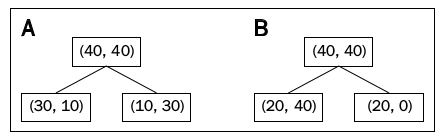

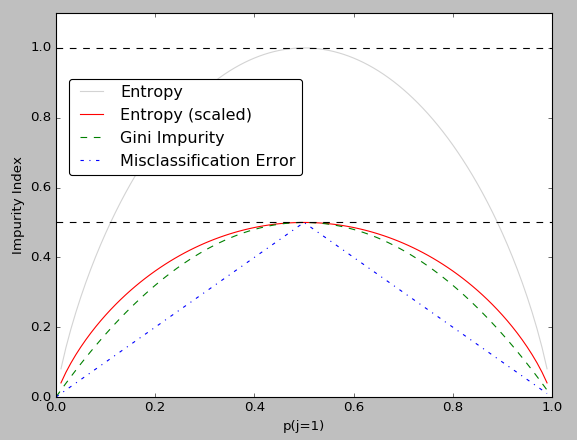

# Constructing the Decision Tree

http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Constructing_Decision_Tree_Learning_Information_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php

## Using Information Gain to Construct a Decision Tree

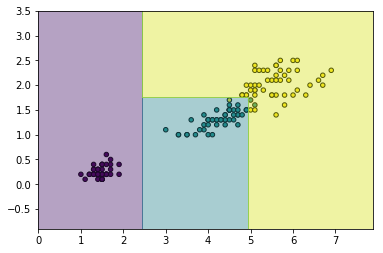

In [8]:
from sklearn.datasets import load_iris
import numpy as np 
import pandas as pd
import sklearn.tree as t

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target


tree = t.DecisionTreeClassifier(criterion = 'entropy', max_depth =3, min_samples_leaf = 1)
tree.fit(X,y)

import os
os.chdir('C:\\Users\\Harrison\\Documents\\GitHub\\ML-Notes')
from VisualFuncs import VDR
VDR([0,1],X,y,tree)

## Notes on Splitting Criteria

$IG(D_{p}, a) = I(D_{p}) - p_{left} I(D_{left}) - p_{right} I(D_{right})$

Note that the information is weighted by the proportion of the split size, wince it is a weighted sum we maximize IG by deacreasing impurity entropy of the as much as possible in each of the child nodes. 

If you considure the parent impurity as fixed, finding the split that maximizes IG is the same problem as finding the subset that minimize impurity/entropy for both of the child datasets.

Since these functions are not continuous, gradient descent might not be useful, we could instead iterate over a feature and find the points of maximum information gain.

## Gini Index Derived

http://nbviewer.jupyter.org/github/ethen8181/machine-learning/blob/master/trees/decision_tree.ipynb


$\begin{align*}
I_G(t) &= \sum_{i =1}^{C} p(i \mid t) \big(1-p(i \mid t)\big) \nonumber \\ 
       &= \sum_{i =1}^{C} p(i \mid t) - p(i \mid t)^2 \nonumber \\ 
       &= \sum_{i =1}^{C} p(i \mid t) - \sum_{i =1}^{C} p(i \mid t)^2 \nonumber \\ 
       &= 1 - \sum_{i =1}^{C} p(i \mid t)^2
\end{align*}$


Compared to entropy (which has a max of 1), gini index has a max value of 0.5

In practice, gini and entropy perform about the same. Not worth the time of really discriminating between the two. Gini might be faster.

# Decision Trees for Regression.

In classification we used gini and entropy to find the split of maximum Information Gain in our data set.

For Regression we use mean square error for continuous values.

$I_{MSE}(t) = \frac{1}{N_t} \sum_i^{N_t}(y_i - \bar{y})^2$

Where $\bar{y}$ is the average response at node t. $N_t$ is the number of observations that reached the node. In this way each leaf predicts the average response of its dataset, so we find the splits that have the subsets that vary from the mean as little possible. (Still tantamount to making pure subdatasets)

# Decision Tree Learning Wiki
https://en.wikipedia.org/wiki/Decision_tree_learning


A predictive model that has high interpretability and no need for standardization.


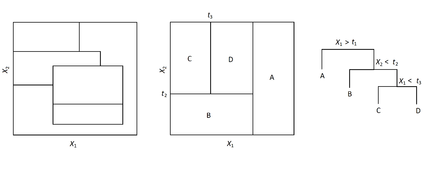


A tree learns by splitting the root node into subsets. Where each subset is recursively split in the same way (recursive partitioning) Recursion (max depth) is complete when the subset at a node is completely pure, or when splitting cannot improve the purity of a set.

The top down splitting method is a greedy algorithm. chooses the split with the biggest infogain at each node, but might not find the most optimal solution. The greedy algorithm is the most common strategy for building a decision tree.

#### In Data Mining
Decision trees can be used to categorize heeps of data.


## CART (Classification and Regression Tree)
As described above the decision tree uses a greedyy algorithm that optimizes information gain of each split. for classification info gain is measured with gini and entropy. Both seek to reduce the impurity of a split. (ie maximize class seperation in set partition) In Regression we use MLE to choose the split whose subsets vary the least from their means. Comes down to finding the least variant subsets at each node.

## Ensemble Methods
Boosting - one-at-a-time tree creation that makes new trees focusing on the samples thaat were misclassified by the previous trees. Adaboost

Bagging - bootstrap aggregation builds a bunch of decision trees all at once, each focused on a resampling of the training data with replacement. The entire model predicts by voting . 
    - Random Forest
    - Rotation - every decision tree applies Principal component analysis on a random subset of the input features.
    -


## Decision Tree Metrics
How do we choose the best feature to split on at each node?
GINI -- Used by CART how often a random observation from the subset would be mislabeled.

Information gain decides which feature to split on.

Variance reduction -- employed in CART regression total reduction  of the target variable x due to the split

## Decision Tree Limitations

- not as accurate as others
- non robust
- cannot guarantee the return of global optima classifier
- Overfit
- cannot do XOR


## Pruning

https://en.wikipedia.org/wiki/Pruning_(decision_trees)

Reduce the size of decision trees (and avoid overfitting) by removing branches with little predictive power

### Techniques
Reduced error pruning - starting at leaves, each node is changed to its most common class, if prediction power is not affected, keep the change. Simple/ Quick

Cost Complexity Pruning - generate a bunch of sub trees and keep the best one.
